/tmp/ipython-input-3890662498.py:89: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3890662498.py:89: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3890662498.py:89: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3890662498.py:89: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3890662498.py:89: UserWarning: Glyph 127939 (\N{RUNNER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3890662498.py:89: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3890662498.py:89: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-pa

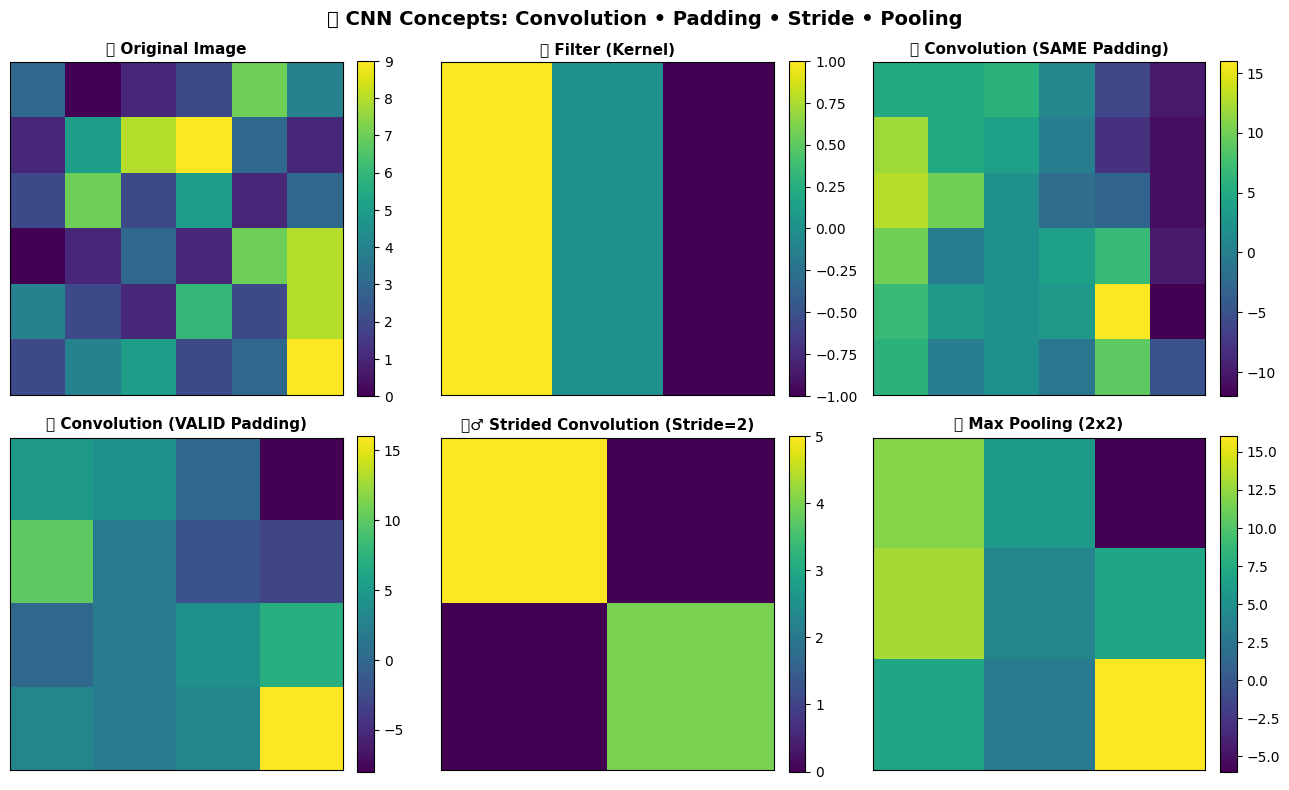

In [ ]:
# =====================================================
# CNN Fundamentals Visualizer for Students
# Concepts: Convolution, Padding, Stride, Pooling
# Author: For Classroom Teaching
# =====================================================

import numpy as np
import matplotlib.pyplot as plt
#scipy is a massive, fundamental Python library for scientific computing (like NumPy, but higher-level).
from scipy.signal import convolve2d
#.signal is a specific module inside the SciPy library that deals with signal processing tasks, like filtering and transformations. Since images are 2D signals, tools from signal processing are often used for basic image manipulations.
#convolve2d is the function that executes the 2-dimensional convolution operation—the exact sliding, multiplying, and summing process central to Convolutional Neural Networks (CNNs).

# -------------------------------
# STEP 1: Create a simple image
# -------------------------------
image = np.array([
    [3, 0, 1, 2, 7, 4],
    [1, 5, 8, 9, 3, 1],
    [2, 7, 2, 5, 1, 3],
    [0, 1, 3, 1, 7, 8],
    [4, 2, 1, 6, 2, 8],
    [2, 4, 5, 2, 3, 9]
], dtype=np.float32)

# -------------------------------
# STEP 2: Define a filter (Kernel)
# -------------------------------
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)  # Simple edge detector

# -------------------------------
# STEP 3: SAME and VALID Convolution
# -------------------------------
conv_same = convolve2d(image, kernel, mode='same')
#mode='same'	The Rule. This is the crucial setting. It forces the output size to match the input size.	The Zero-Padding Frame (the blank border paper).
#mode='same' is to ensure that the Output Image (conv_same) has the exact same dimensions (Width x Height) as the Input Image (image).

#mode='valid'	The Rule. This is the crucial setting. It forces the convolution to happen only where the kernel perfectly fits.	The Strict Frame (no added border).
conv_valid = convolve2d(image, kernel, mode='valid')

# -------------------------------
# STEP 4: Stride Implementation
# -------------------------------
stride = 2
conv_stride = convolve2d(image, kernel, mode='valid')
conv_stride = conv_stride[::stride, ::stride] #slicing to manually downsample the Feature Map.

# -------------------------------
# STEP 5: Padding Visualization
# -------------------------------
pad = 1
padded_image = np.pad(image, pad, mode='constant', constant_values=0)
#mode='constant': This specifies the method used to fill the border pixels. The 'constant' mode tells the function to fill the border with a single, uniform value.
# -------------------------------
# STEP 6: Max Pooling (2x2)
# -------------------------------
def max_pool(feature_map, size=2, stride=2):
    h, w = feature_map.shape
    pooled = np.zeros(((h - size)//stride + 1, (w - size)//stride + 1))
    for i in range(0, h - size + 1, stride):
        for j in range(0, w - size + 1, stride):
            pooled[i//stride, j//stride] = np.max(feature_map[i:i+size, j:j+size])
    return pooled

pooled = max_pool(conv_same)

# -------------------------------
# STEP 7: Plot Everything
# -------------------------------
fig, axes = plt.subplots(2, 3, figsize=(13, 8))
axes = axes.ravel()

titles = [
    "🖼️ Original Image",
    "🎯 Filter (Kernel)",
    "🔍 Convolution (SAME Padding)",
    "🚫 Convolution (VALID Padding)",
    "🏃‍♂️ Strided Convolution (Stride=2)",
    "🌊 Max Pooling (2x2)"
]

images = [image, kernel, conv_same, conv_valid, conv_stride, pooled]

for i in range(6):
    im = axes[i].imshow(images[i], cmap='viridis', interpolation='nearest')
    axes[i].set_title(titles[i], fontsize=11, fontweight='bold')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

plt.suptitle("🧠 CNN Concepts: Convolution • Padding • Stride • Pooling", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


################################################################

# Images On Edge
A lot of the details of what makes up an image are contained in its edges or outlines. <br>  Reasons why we can easily distinguish objects in cartoon sketches. <br> Edge perception is not just limited to human vision, some studies have argued that it is one of the reasons why Avians (birds) are so adept at dodging obstacles mid-flight <br> 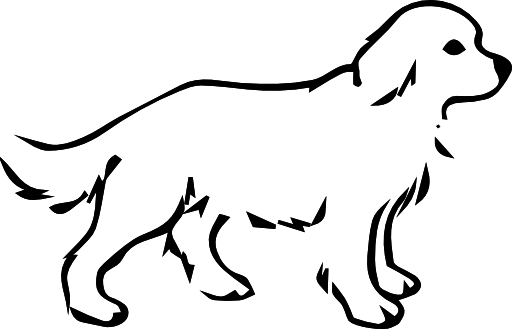

A grayscale image is an image in which the value of each pixel is a single sample, ***representing only the amount of light (brightness or intensity) at that location***. This single value ***determines a shade of gray, ranging from absolute black to absolute white.*** <br>

*   ***Color Images (RGB)***: These are stored in ***three layers, or channels: Red, Green, and Blue.*** If an image is $H$ (Height) by $W$ (Width), its data dimensions are $H \times W \times 3$. Each pixel has three values (one for each color).

*   ***Grayscale Images***: These are stored using only one channel.<br>
***Dimensions:*** If the image is $H \times W$, its data dimensions are simply $H
\times W$.<br> ***Pixel Values***:Each pixel is represented by a single integer, usually from 0 to 255. <br> 0 typically represents Black (no light/intensity).<br> 255 typically represents White (maximum light/intensity).<br>Values in between represent various shades of gray.9



In [ ]:
import numpy as np
import torch
import torch.nn.functional as F #PyTorch that contains common non-learnable operations used in neural networks.
import cv2
from tqdm import tqdm #Crucial in DL for visualizing training progress
import matplotlib.pyplot as plt


def convolve(image_filepath, filter, title=''):
    """
    This function performs convolution and
    returns both the original and convolved
    images.
    """

    #  reading image in grayscale format
    image = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)
    #Grayscale images are simpler and have less data, making them faster to process and often used for initial experiments or specific tasks where color information isn't critical.

    #  defining filter size
    filter_size = filter.shape[0]

    #  creating an array to store convolutions (x-m+1, y-n+1)
    convolved = np.zeros(((image.shape[0] - filter_size) + 1,
                      (image.shape[1] - filter_size) + 1))

    #  performing convolution
    for i in tqdm(range(image.shape[0])):
      for j in range(image.shape[1]):
        try:
          convolved[i,j] = (image[i:(i+filter_size),
                                  j:(j+filter_size)] * filter).sum()
        except Exception:
          pass

    #  converting to tensor
    convolved = torch.tensor(convolved)
    #  applying relu activation
    convolved = F.relu(convolved)

    #  producing plots
    figure, axes = plt.subplots(1,2, dpi=120)
    plt.suptitle(title)
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('original')
    axes[1].imshow(convolved, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('convolved')
    pass

# Prewitt Filters
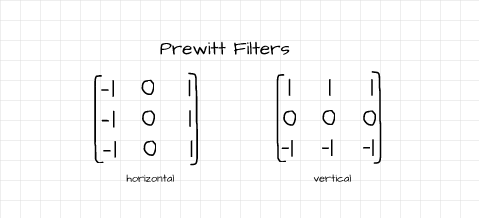 <br> Prewitt **operator is comprised of two filters which help to detect vertical and horizontal edges**. <br> The **horizontal (x-direction) filter helps to detect edges in the image which cut perpendicularly through the horizontal axis** and vise versa for the vertical (y-direction) filter.

In [ ]:

horizontal = np.array([
    [-1, 0, 1],
    [ -1,  0,  1],
    [ -1, 0,  1]
])

vertical =np.array([
    [1, 1, 1],
    [ 0,  0,  0],
    [ -1, -1,  -1]
])

100%|██████████| 159/159 [00:00<00:00, 714.36it/s]


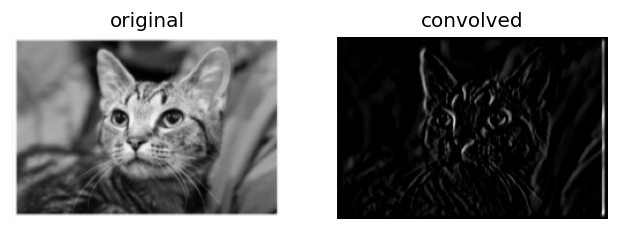

In [ ]:
# utilizing the horizontal filter
convolve('/content/cat.png', horizontal)

100%|██████████| 159/159 [00:00<00:00, 736.69it/s]


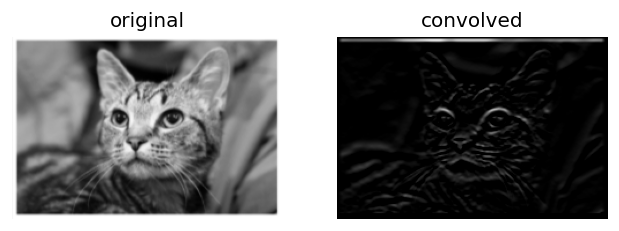

In [ ]:
convolve('/content/cat.png', vertical)

# Sobel Filters
Sobel operator is **also made up of a vertical and horizontal edge detection** filter. Detected edges are **quite similar to results obtained using Prewitt filters**, but with a distinction of ***higher edge pixel intensity***. In other words, ***edges detected using the Sobel filters are sharper in comparison to Prewitt filters***.

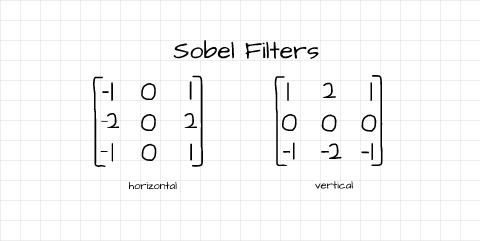

In [ ]:
shorizontal = np.array([
    [-1, 0, 1],
    [ -2,  0,  2],
    [ -1, 0,  1]
])

svertical =np.array([
    [1, 2, 1],
    [ 0,  0,  0],
    [ -1, -2,  -1]
])

100%|██████████| 159/159 [00:00<00:00, 629.82it/s]


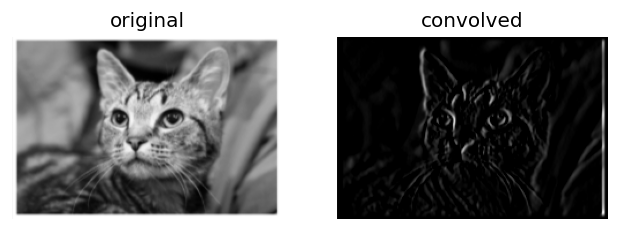

In [ ]:
convolve('/content/cat.png', shorizontal)

100%|██████████| 159/159 [00:00<00:00, 414.32it/s]


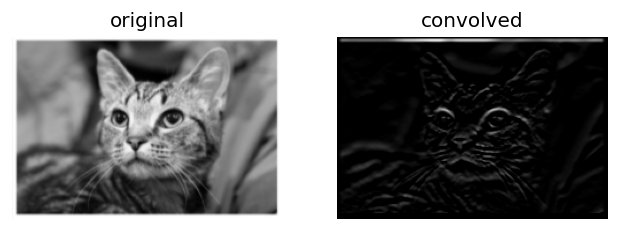

In [ ]:
convolve('/content/cat.png', svertical)

# Laplacian Filter
a single filter ***which detects edges of different orientation***. From a mathematical standpoint, it computes second order derivatives of pixel values unlike the Prewitt and Sobel filters which compute first order derivatives.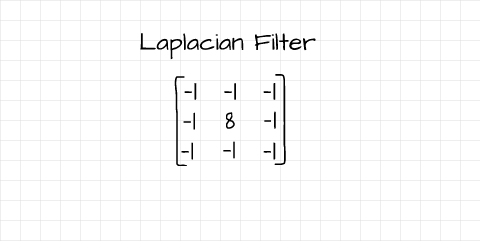

In [ ]:
laplacian = np.array([
    [-1, -1, -1],
    [ -1,  8,  -1],
    [ -1, -1,  -1]
])

100%|██████████| 159/159 [00:00<00:00, 712.63it/s]


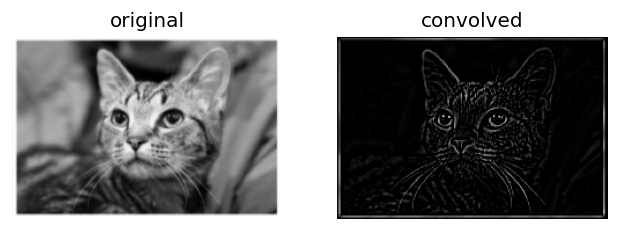

In [ ]:
convolve('/content/cat.png', laplacian)

# Robinson Compass Masks
These filters help to detect edges oriented in those compass directions.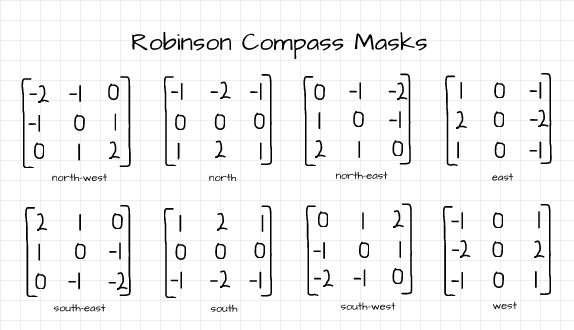

# Krisch Compass Masks
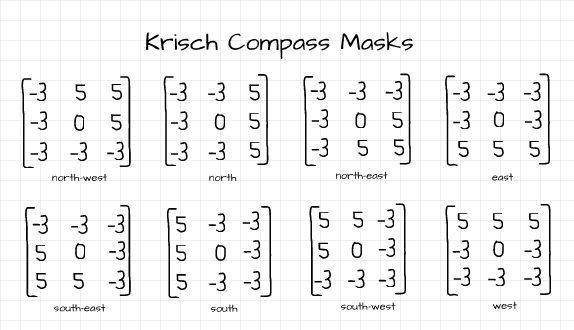

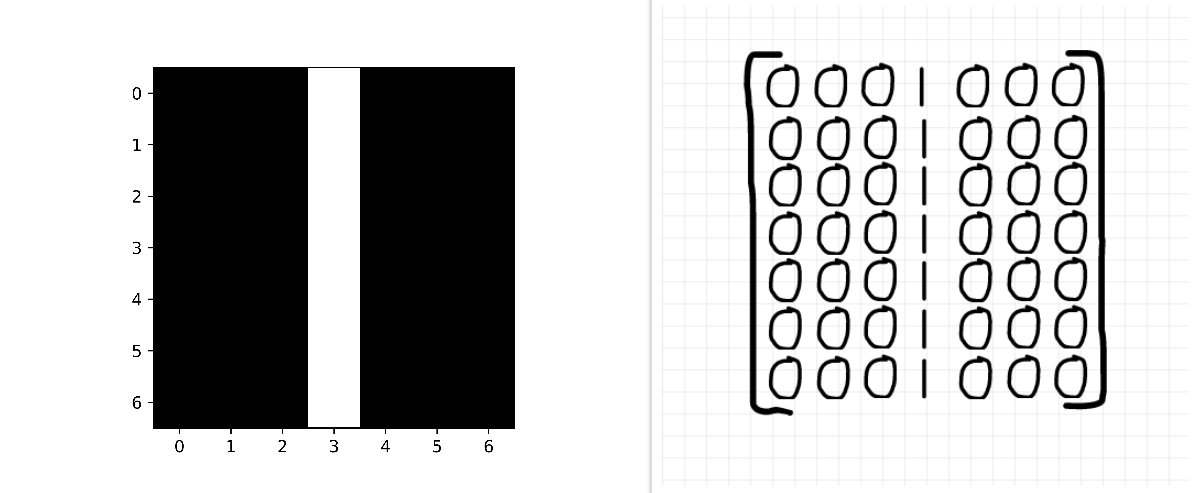 What you see vs. what a computer ‘sees’

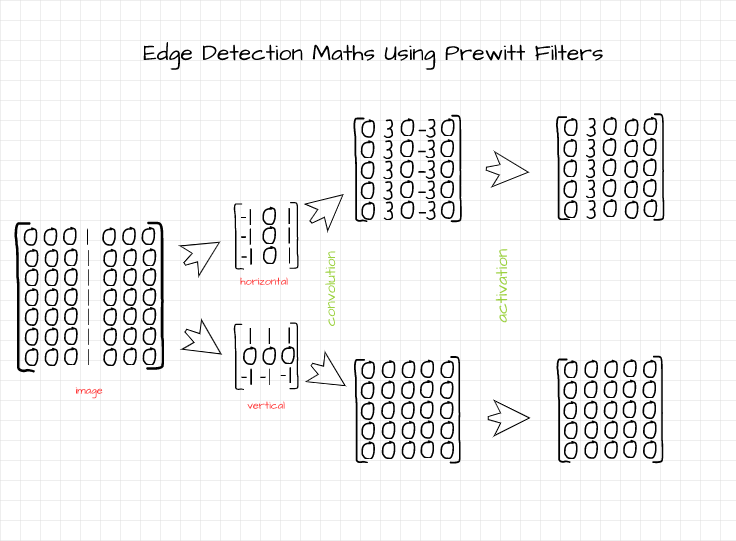

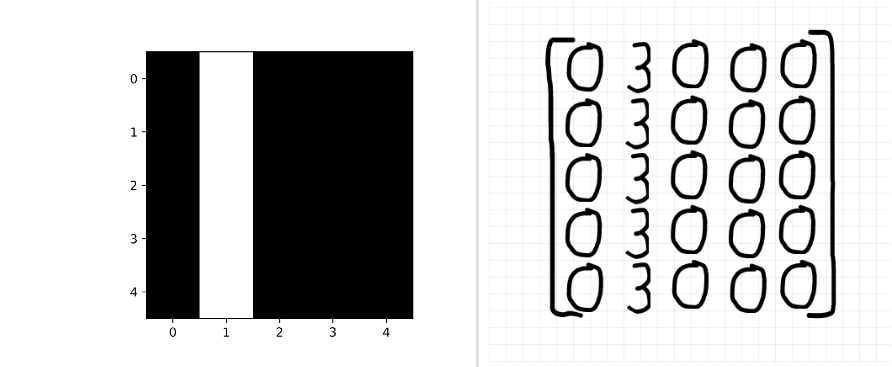Edge detected by the horizontal filter

##########################

# Preprocess and Augment Images
Common image preprocessing operations include noise removal, edge-preserving smoothing, color space conversion, contrast enhancement, and morphology.

1.    The most common type of image ***augmentation operations are geometric transformations such as rotation and translation***, which simulate variations in the camera orientation with respect to the scene.
2.  ***Color jitter simulates variations of lighting conditions*** and color in the scene.
3. Artificial noise ***simulates distortions caused by the electrical fluctuations*** in the sensor and analog-to-digital conversion errors.
4. Blur simulates an out-of-focus lens or movement of the camera with respect to the scene.



In [ ]:
"""
End-to-End CNN Tutorial Script (students)
Dataset: CIFAR-10 (built-in)
Framework: TensorFlow / Keras
What you'll see:
 - Data loading and exploratory checks
 - Preprocessing (normalization) + augmentation
 - CNN model definition (Conv -> Pool -> BatchNorm -> Dropout)
 - Training with callbacks: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
 - Evaluation: loss/acc curves, confusion matrix, classification report, sample predictions
 - Save/Load model
Run in Google Colab or local Jupyter. GPU recommended.
"""

"\nEnd-to-End CNN Tutorial Script (students)\nDataset: CIFAR-10 (built-in)\nFramework: TensorFlow / Keras\nWhat you'll see:\n - Data loading and exploratory checks\n - Preprocessing (normalization) + augmentation\n - CNN model definition (Conv -> Pool -> BatchNorm -> Dropout)\n - Training with callbacks: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint\n - Evaluation: loss/acc curves, confusion matrix, classification report, sample predictions\n - Save/Load model\nRun in Google Colab or local Jupyter. GPU recommended.\n"

In [ ]:
# --------------------------
# 0) Install / imports (Colab: run once)
# --------------------------
try:
    import tensorflow as tf
except Exception:
    !pip install -q tensorflow
    import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Reproducibility (best-effort)
SEED = 123
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
# --------------------------
# 1) Data collection: CIFAR-10
# --------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# y arrays are shape (N,1) -> flatten
y_train = y_train.flatten()
y_test  = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print("Train samples:", x_train.shape, "Test samples:", x_test.shape)
print("Example labels:", class_names[y_train[0]])

Train samples: (50000, 32, 32, 3) Test samples: (10000, 32, 32, 3)
Example labels: frog


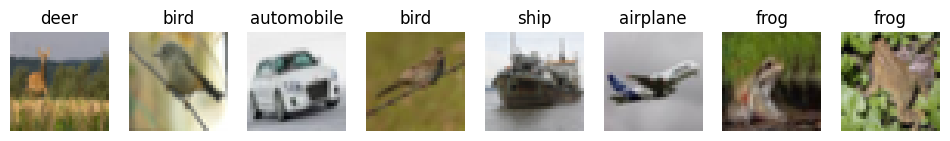

In [ ]:
# Quick visual check (show 8 random images)
def show_sample_images(x, y, classes, n=8):
    idx = np.random.choice(len(x), n, replace=False)
    plt.figure(figsize=(12,3))
    for i, ii in enumerate(idx):
        plt.subplot(1, n, i+1)
        plt.imshow(x[ii].astype('uint8'))
        plt.title(classes[y[ii]])
        plt.axis('off')
    plt.show()

show_sample_images(x_train, y_train, class_names, n=8)

In [ ]:
# --------------------------
# 2) Preprocessing
# - normalize to [0,1] (float32)
# - convert labels to categorical in model via sparse_categorical_crossentropy
# --------------------------
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

In [ ]:
# Split a validation set from training data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.12, random_state=SEED, stratify=y_train)

print("After split -> train:", x_train.shape, "val:", x_val.shape, "test:", x_test.shape)

After split -> train: (44000, 32, 32, 3) val: (6000, 32, 32, 3) test: (10000, 32, 32, 3)


In [ ]:
# --------------------------
# 3) Data Augmentation (ImageDataGenerator)- realtime
# --------------------------
batch_size = 64

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    zoom_range=0.10,
    shear_range=0.05,
    fill_mode='nearest'
)

In [ ]:
# Note: validation/test generator should NOT augment
val_datagen = ImageDataGenerator()

train_gen = train_datagen.flow(x_train, y_train, batch_size=batch_size, shuffle=True, seed=SEED)
val_gen   = val_datagen.flow(x_val, y_val, batch_size=batch_size, shuffle=False)

In [ ]:
# --------------------------
# 4) Model definition (simple but effective CNN)
# - Use Conv2D, BatchNormalization, MaxPool, Dropout
# - Final layer uses softmax; use sparse_categorical_crossentropy so labels stay int
# --------------------------
def make_cnn(input_shape=(32,32,3), num_classes=10):
    inp = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, (3,3), padding='same', activation=None)(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3,3), padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(64, (3,3), padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3,3), padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, (3,3), padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(128, (3,3), padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.4)(x)

    # Flatten -> Dense
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(0.4)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inp, outputs=outputs)
    return model

model = make_cnn()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
# --------------------------
# 5) Compile model
# - optimizer: Adam (with an initial LR)
# - loss: sparse_categorical_crossentropy (since labels are integers)
# - metrics: accuracy
# --------------------------
initial_lr = 1e-3
opt = optimizers.Adam(learning_rate=initial_lr)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# --------------------------
# 6) Callbacks: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# --------------------------
log_dir = "cnn_logs"
os.makedirs(log_dir, exist_ok=True)
checkpoint_path = os.path.join(log_dir, "best_model.h5")

es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
rlrop = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)
mc = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)

In [ ]:
# --------------------------
# 7) Train
# --------------------------
epochs = 50  # students: experiment by changing
steps_per_epoch = int(np.ceil(len(x_train)/batch_size))
val_steps = int(np.ceil(len(x_val)/batch_size))

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_gen,
    validation_steps=val_steps,
    callbacks=[es, rlrop, mc]
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


688/688 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step - accuracy: 0.3309 - loss: 1.9019
Epoch 1: val_loss improved from inf to 1.26674, saving model to cnn_logs/best_model.h5


688/688 ━━━━━━━━━━━━━━━━━━━━ 498s 713ms/step - accuracy: 0.3311 - loss: 1.9015 - val_accuracy: 0.5353 - val_loss: 1.2667 - learning_rate: 0.0010
Epoch 2/50
 37/688 ━━━━━━━━━━━━━━━━━━━━ 7:02 648ms/step - accuracy: 0.5139 - loss: 1.3455

In [ ]:
# --------------------------
# 8) Plot training curves
# --------------------------
def plot_history(hist):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'], label='train_loss')
    plt.plot(hist.history['val_loss'], label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(hist.history['accuracy'], label='train_acc')
    plt.plot(hist.history['val_accuracy'], label='val_acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_history(history)


In [ ]:
# --------------------------
# 10) Confusion matrix + classification report
# --------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test set)')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

# --------------------------
# 11) Visualize some predictions
# --------------------------
def show_predictions(x, y_true, y_pred, class_names, n=12):
    idx = np.random.choice(len(x), n, replace=False)
    plt.figure(figsize=(14,6))
    for i, ii in enumerate(idx):
        plt.subplot(3, 4, i+1)
        plt.imshow((x[ii]*255).astype('uint8'))
        plt.title(f"T:{class_names[y_true[ii]]}\nP:{class_names[y_pred[ii]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(x_test, y_test, y_pred, class_names, n=12)

# --------------------------
# 12) Save the final model (already saved best_model.h5 by checkpoint)
# --------------------------
final_model_path = os.path.join(log_dir, "final_cnn_model.h5")
model.save(final_model_path)
print("Saved final model to", final_model_path)

# --------------------------
# 13) Tips for students (printable)
# --------------------------
tips = [
    "1) Try different augmentations (brightness/contrast, random crop).",
    "2) Change model depth and observe under/overfitting.",
    "3) Experiment with SGD + momentum vs Adam; compare training curves.",
    "4) Use learning rate finder or manual LR schedule to improve convergence.",
    "5) For smaller datasets, consider transfer learning from pretrained models."
]
print("\nTeaching tips:")
for t in tips:
    print(t)

# End of script